<a href="https://colab.research.google.com/github/siddanagoudampatil/bus-route-number-detection/blob/master/googleOCR_busRouteNumberDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
!pip3 install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies
!pip3 install Pillow==9.0.0
!pip3 install gTTs
!pip3 install opencv-python

In [ ]:
import torch
import numpy as np
import cv2
import imutils
from PIL import Image
from gtts import gTTS
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
from google.colab import drive
import shutil

gDriveLink = '/content/drive/MyDrive/major-project/'

drive.mount('/content/drive')
shutil.copytree(gDriveLink, '/content/bus-route-number-detection/')

drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
%cp /content/bus-route-number-detection/best.pt /content/yolov5/

DETECTION USING THE "best.pt"

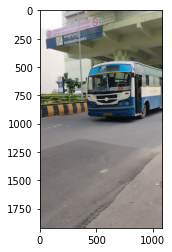

In [ ]:
# select a test image
test_image = '/content/testimg_37.jpg'

# opening the File
img = Image.open(test_image)
# convert to numpy array
img = np.array(img)
plt.imshow(img);

In [ ]:
# model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/bus-route-number-detection/best.pt', source='local')

# inference
results = model(img)

# results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

YOLOv5 🚀 v6.1-289-g526e650 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 1920x1080 1 bus-number
Speed: 2.5ms pre-process, 11.9ms inference, 1.3ms NMS per image at shape (1, 3, 640, 384)


In [ ]:
bounding_box = results.pandas().xyxy[0]  # img predictions (pandas)

In [ ]:
display(bounding_box)

,xmin,ymin,xmax,ymax,confidence,class,name
0,676.267822,673.473083,731.092773,713.001526,0.510033,0,bus-number


In [ ]:
# xmin
x_min = int(bounding_box['xmin'][0])

# xmax
x_max = int(bounding_box['xmax'][0])

# ymin
y_min = int(bounding_box['ymin'][0])

# ymax
y_max = int(bounding_box['ymax'][0])

# use numpy slicing to crop the region of interest
roi = img[y_min:y_max,x_min:x_max]

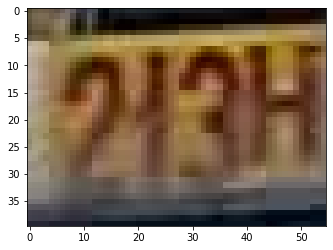

In [ ]:
# plot the region of interest
plt.imshow(roi);

In [ ]:
cv2.imwrite("temp/inputToOCR.jpg", roi)
image_loc = "temp/inputToOCR.jpg"

In [ ]:
!pip install google-cloud-vision

In [ ]:
import os, io
from google.cloud import vision


os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/content/ServiceAccountToken.json'

client = vision.ImageAnnotatorClient()

folder_path = r'/content/temp/inputToOCR.jpg'

with io.open(folder_path, 'rb') as image_file:
  content = image_file.read()

image = vision.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations

df = pd.DataFrame(columns=['locale', 'description'])

for text in texts:
  df = df.append(
      dict(
          locale = text.locale,
          description = text.description
      ),
      ignore_index = True
  )



print(df['description'][0])

213H


In [ ]:
audio_text = df['description'][0]
language = 'en'
audio_obj = gTTS(text=audio_text, lang=language, slow=False)
audio_obj.save("../bus_number.mp4")

# Display option to play audio file in notebook
ipd.Audio('../bus_number.mp4')